# **Decision Tree Classifier**

## ✅ Bagian 1: Hitungan Manual Information Gain
Kita akan buat dataset sederhana dengan:

15 data

2 fitur: F1 dan F2

3 kelas: A, B, C

Dataset:

| ID | F1 | F2 | Kelas |
| -- | -- | -- | ----- |
| 1  | H  | X  | A     |
| 2  | H  | X  | A     |
| 3  | H  | Y  | B     |
| 4  | H  | Y  | B     |
| 5  | H  | Z  | C     |
| 6  | H  | Z  | C     |
| 7  | M  | X  | A     |
| 8  | M  | X  | A     |
| 9  | M  | Y  | B     |
| 10 | M  | Y  | B     |
| 11 | M  | Z  | C     |
| 12 | M  | Z  | C     |
| 13 | R  | X  | A     |
| 14 | R  | Y  | B     |
| 15 | R  | Z  | C     |


Keterangan

F1: {H, M, R}

F2: {X, Y, Z}

Kelas: {A, B, C}

1. Hitung Entropy Total (S)

Kita hitung proporsi setiap kelas:

A: 5

B: 5

C: 5

Rumus entropi:

$$
\text{Entropy}(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)
= -3 \times \left( \frac{5}{15} \log_2  \frac{5}{15}  \right)
= -3 \times \left( \frac{1}{3} \log_2  \frac{1}{3}  \right)
= \log_2 3 \approx 1.585
$$

2. Hitung Information Gain untuk F1
F1 = H: (data 1-6) → A=2, B=2, C=2

$$
\text{Entropy} = -3 \times \left( \frac{2}{6} \log_2  \frac{2}{6}  \right) = \log_2 3 \approx 1.585
$$

F1 = M: (data 7-12) → A=2, B=2, C=2 → Sama: Entropy ≈ 1.585

F1 = R: (data 13-15) → A=1, B=1, C=1 → Sama: Entropy ≈ 1.585

$$
IG(F_1) = 1.585 - \left( \frac{6}{15} \cdot 1.585 + \frac{6}{15} \cdot 1.585 + \frac{3}{15} \cdot 1.585 \right) \\
= 1.585 - 1.585 = 0
$$

3. Hitung Information Gain untuk F2
F2 = X: data [1,2,7,8,13] → A=5
→ Entropy = 0 (karena pure class)

F2 = Y: data [3,4,9,10,14] → B=5
→ Entropy = 0

F2 = Z: data [5,6,11,12,15] → C=5
→ Entropy = 0

$$
IG(F_2) = 1.585 - \left( \frac{5}{15} \cdot 0 + \frac{5}{15} \cdot 0 + \frac{5}{15} \cdot 0 \right) \\
= 1.585 - 0 = 1.585
$$


✅ Kesimpulan Pemilihan Fitur Awal
IG(F1) = 0

IG(F2) = 1.585 → F2 dipilih sebagai root tree

## ✅ Bagian 2: Bandingkan dengan Sklearn DecisionTreeClassifier

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Dataset
data = {
    'F1': ['H','H','H','H','H','H','M','M','M','M','M','M','R','R','R'],
    'F2': ['X','X','Y','Y','Z','Z','X','X','Y','Y','Z','Z','X','Y','Z'],
    'Kelas': ['A','A','B','B','C','C','A','A','B','B','C','C','A','B','C']
}
df = pd.DataFrame(data)

# Encode fitur
df_encoded = pd.get_dummies(df[['F1','F2']])
y = df['Kelas']

# Training
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(df_encoded, y)

# Tampilkan decision tree dalam bentuk text
print(export_text(clf, feature_names=list(df_encoded.columns)))


|--- F2_Y <= 0.50
|   |--- F2_Z <= 0.50
|   |   |--- class: A
|   |--- F2_Z >  0.50
|   |   |--- class: C
|--- F2_Y >  0.50
|   |--- class: B



Pohon keputusan ini setara dengan:

Jika F2 == 'X' → A

Jika F2 == 'Y' → B

Jika F2 == 'Z' → C

## ✅ Bagian 3: Buat Pohon dan Rule + Uji 2 Data Baru
Rule dari pohon:

In [2]:
# Data baru
data_baru = {'F1': 'R', 'F2': 'X'}

# Rule pohon
if data_baru['F2'] == 'X':
    prediksi = 'A'
elif data_baru['F2'] == 'Y':
    prediksi = 'B'
elif data_baru['F2'] == 'Z':
    prediksi = 'C'

print(f"Hasil prediksi: {prediksi}")


Hasil prediksi: A


Uji 2 data baru:

| F1 | F2 | Prediksi |
| -- | -- | -------- |
| R  | X  | A        |
| M  | Z  | C        |


In [3]:
import pandas as pd

# Data baru
data_baru = pd.DataFrame([{'F1': 'R', 'F2': 'X'}, {'F1': 'M', 'F2': 'Z'}])

# Lakukan encoding yang sama seperti saat training
data_baru_encoded = pd.get_dummies(data_baru)
# Pastikan semua kolom sama
for col in df_encoded.columns:
    if col not in data_baru_encoded:
        data_baru_encoded[col] = 0
data_baru_encoded = data_baru_encoded[df_encoded.columns]

# Prediksi
hasil = clf.predict(data_baru_encoded)
print("Prediksi kelas:", hasil)


Prediksi kelas: ['A' 'C']


Visualisasi

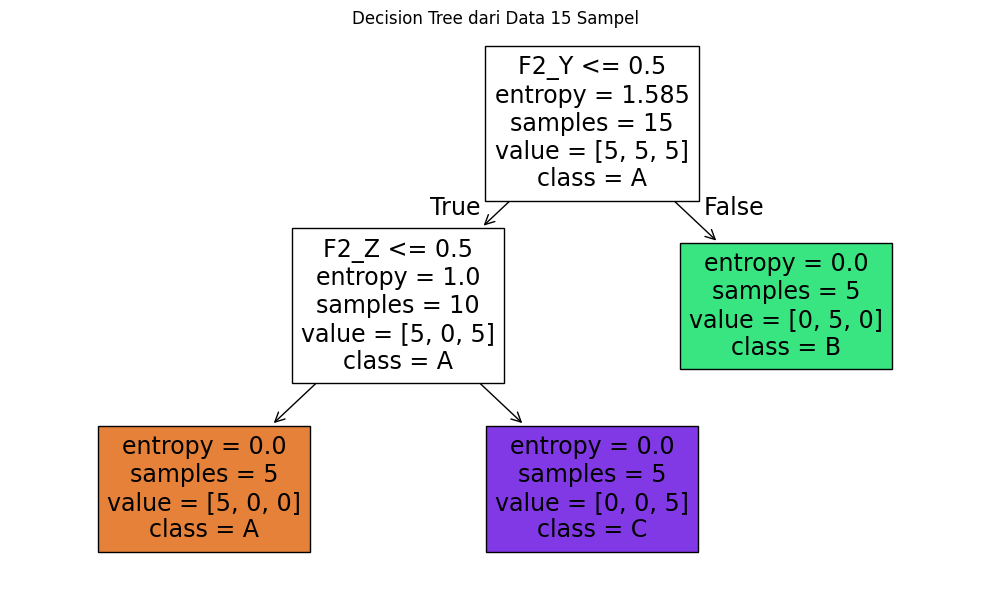

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Visualisasi pohon
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=df_encoded.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree dari Data 15 Sampel")
plt.tight_layout()
plt.show()

Berikut adalah visualisasi dari decision tree berdasarkan dataset 15 sampel. Terlihat bahwa pohon langsung membuat keputusan berdasarkan fitur F2:

Jika F2_X = 1 → Kelas A

Jika F2_Y = 1 → Kelas B

Jika F2_Z = 1 → Kelas C

Artinya, fitur F2 secara sempurna memisahkan ketiga kelas.

🔚 Kesimpulan
Secara manual dan dengan Sklearn menghasilkan pohon identik.

Information Gain terbesar pada fitur F2, karena langsung membagi data ke dalam 3 kelas murni.

Rule yang dihasilkan sangat sederhana karena dataset memang bersifat perfectly separable dengan F2.